In [ ]:
# @title import
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math
import matplotlib as mpl
import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from IPython.display import Latex

import gcsfs
from dfply import *
from IPython.core.display import display, HTML
from IPython.display import Image as jp_image # mnist도 image라서 이름 바꿈
display(HTML("<style>.container { width:85% !important; }</style>"))

import os
import sys
import pickle

C:\Users\mrjjo\Anaconda3\envs\py37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(os.getcwd())

D:\공유 드라이브\Predictive Marketing\Team\개인\항민\deep_learning_from_the_basic


In [ ]:
#mac
# path = "/Volumes/GoogleDrive/공유 드라이브/Predictive Marketing/Team/개인/항민/deep_learning_from_the_basic/other/deep_learning_images/"
#windows
path = "D:\공유 드라이브\Predictive Marketing\Team\개인\항민\deep_learning_from_the_basic\other\deep_learning_images/"

In [ ]:
print(path)

D:\공유 드라이브\Predictive Marketing\Team\개인\항민\deep_learning_from_the_basic\other\deep_learning_images/


In [ ]:
# def fig(img_name, img_type = ".png", w = 200, h = 200):
#   img_name = str(img_name)+str(img_type)
#   return Image(path+img_name, width = w, height = h)

In [ ]:
def fig(img_name, img_type = ".png", w = 200, h = 200):
  img_name = str(img_name)+str(img_type)
  return jp_image(path+img_name, width = w, height = h)

# Ch.4. 신경망 학습

## 데이터에서 학습한다!

신경망의 특징은 데이터를 보고 학습할 수 있다는 점임

-> 데이터를 보고 가중치 매개변수의 값을 자동으로 결정한다는 말이다.

퍼셉트론처럼 입력값에 대해서 진리표를 보면서 사람이 가중치를 수작업으로 입력할 필요가 없다는 소리.



### 데이터 주도 학습

일반적인 기계학습은 사람의 개입(직관, 경험)을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도함. 
게다가 신경망과 딥러닝은 이보다 더 사람의 개입을 배제할 수 있게 해주는 중요한 특성을 지녔음 
아래와 같은 이미지가 주어졌고 해당 이미지가 숫자 5인지 아닌지를 분류하는 알고리즘이 당장 떠오르는가?


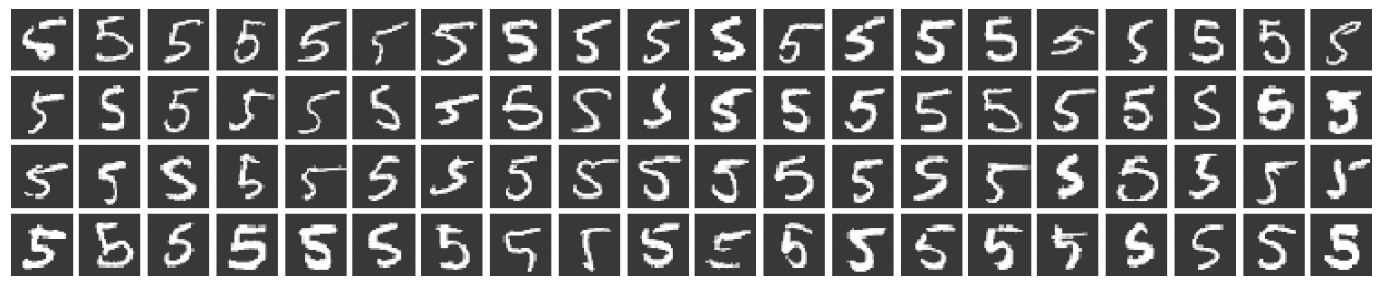

In [ ]:
print("일반적인 기계학습은 사람의 개입(직관, 경험)을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도함. \n"
      "게다가 신경망과 딥러닝은 이보다 더 사람의 개입을 배제할 수 있게 해주는 중요한 특성을 지녔음 \n"
     "아래와 같은 이미지가 주어졌고 해당 이미지가 숫자 5인지 아닌지를 분류하는 알고리즘이 당장 떠오르는가?")
fig("fig 4-1", w = 500)

알고리즘은 떠오르지 않더라도 보통의 사람이라면 충분히 분류할 수 있는 문제 
그러나 알고리즘(프로그래밍)으로 이를 풀어내려면 이미지에서 특징을 추출하고 패턴을 학습하는 과정이 필요함(이미지를 벡터로 변환하는 등)


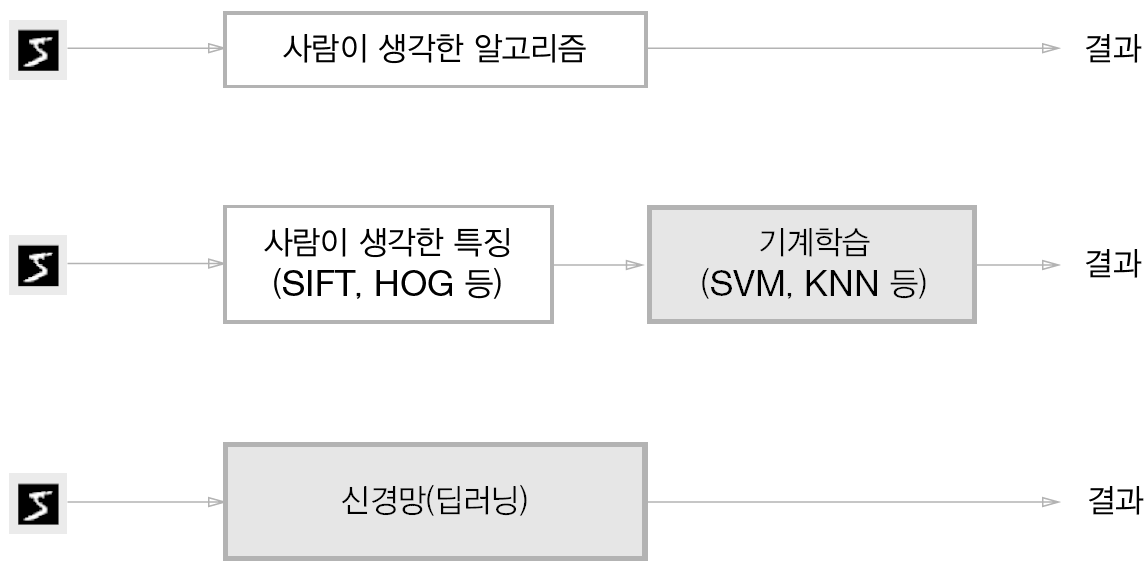

In [ ]:
print("알고리즘은 떠오르지 않더라도 보통의 사람이라면 충분히 분류할 수 있는 문제 \n"
     "그러나 알고리즘(프로그래밍)으로 이를 풀어내려면 이미지에서 특징을 추출하고 패턴을 학습하는 과정이 필요함(이미지를 벡터로 변환하는 등)")
fig("fig 4-2", w = 500)

In [ ]:
print("일반적인 기계학습은 사람의 주관(특징 설계, 탐색)이 필연적임 \n"
     "신경망은 이미지에 포함된 특징을 '스스로', '있는 그대로' 학습한다.")
#end-to-end machine learning이라고도 표현함

일반적인 기계학습은 사람의 주관(특징 설계, 탐색)이 필연적임 
신경망은 이미지에 포함된 특징을 '스스로', '있는 그대로' 학습한다.


### 훈련 데이터와 시험 데이터

In [ ]:
print("기계학습 문제는 데이터를 train, test로 나누는 것이 일반적이며, train set을 통해 만든 모델을 test set에 적용하여 모델을 평가함")
#너무 당연한 이야기만 나와서 이건 pass~~

기계학습 문제는 데이터를 train, test로 나누는 것이 일반적이며, train set을 통해 만든 모델을 test set에 적용하여 모델을 평가함


## 손실 함수

In [ ]:
print("신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현함. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수를 탐색함. \n"
     "이 지표를 손실 함수(loss function)라고 함 \n"
     "일반적으로 손실함수는 '오차제곱합', '교차 엔트로피 오차'를 사용 \n"
     "손실 함수는 신경망 성능이 얼마나 '나쁨'을 나타내는데, 여기에 (-)만 곱해주면 얼마나 좋은가?를 나타내줄 수 있음")

신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현함. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수를 탐색함. 
이 지표를 손실 함수(loss function)라고 함 
일반적으로 손실함수는 '오차제곱합', '교차 엔트로피 오차'를 사용 
손실 함수는 신경망 성능이 얼마나 '나쁨'을 나타내는데, 여기에 (-)만 곱해주면 얼마나 좋은가?를 나타내줄 수 있음


가장 많이 쓰이는 손실 함수는 오차제곱합(Sum of Squares for Error;SSE)이며, 수식은 아래와 같음.


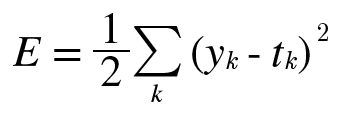

In [ ]:
print("가장 많이 쓰이는 손실 함수는 오차제곱합(Sum of Squares for Error;SSE)이며, 수식은 아래와 같음.")
fig("e 4.1", w = 300)

In [ ]:
print("예측값 y와 실젯값 t가 아래와 같이 주어졌을 때")
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print("y: "+ str(y))
print("t: " + str(t))

예측값 y와 실젯값 t가 아래와 같이 주어졌을 때
y: [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print("오차제곱합은 예측값과 실젯값의 차이를 제곱한 후 그 총합을 구함")

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

오차제곱합은 예측값과 실젯값의 차이를 제곱한 후 그 총합을 구함


In [ ]:
# 예측값의 argmax가 index 2번이고 실젯값도 index 2번일 때
print("argmax_index: " + str(np.argmax(np.array(y))))

print("SSE: " + str(sum_squares_error(np.array(y), np.array(t)))) # 변수가 list라서 np.array로 바꿔주는 것

argmax_index: 2
SSE: 0.09750000000000003


In [ ]:
# 예측값의 argmax가 index 7번이고 실젯값은 index 2번일 때
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print("argmax_index: " + str(np.argmax(np.array(y))))

print("SSE: " + str(sum_squares_error(np.array(y), np.array(t))))

argmax_index: 7
SSE: 0.5975


In [ ]:
print("예측값의 argmax가 index 2번이고 실젯값도 index 2번일 때 손실함수가 더 적다.")

예측값의 argmax가 index 2번이고 실젯값도 index 2번일 때 손실함수가 더 적다.


### 교차 엔트로피 오차

교차 엔트로피 오차의 (Cross Entropy Error;CEE)이며, 수식은 아래와 같음. *log의 밑은 e(자연로그)


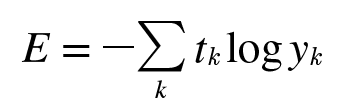

In [ ]:
print("교차 엔트로피 오차의 (Cross Entropy Error;CEE)이며, 수식은 아래와 같음. *log의 밑은 e(자연로그)")
fig("e 4.2", w = 300)

교차 엔트로피 오차는 정답일 때의 출력이 전체 손실값을 나타낸다. 
원핫인코딩 상태의 tk(실젯값) = 0이면 E = 0이 되기 때문 
원핫인코딩 상태의 tk(실젯값) <> 0이고 수식에 의해 산출된 값도 0이 아니면 아래와 같은 형태로 값이 출력됨


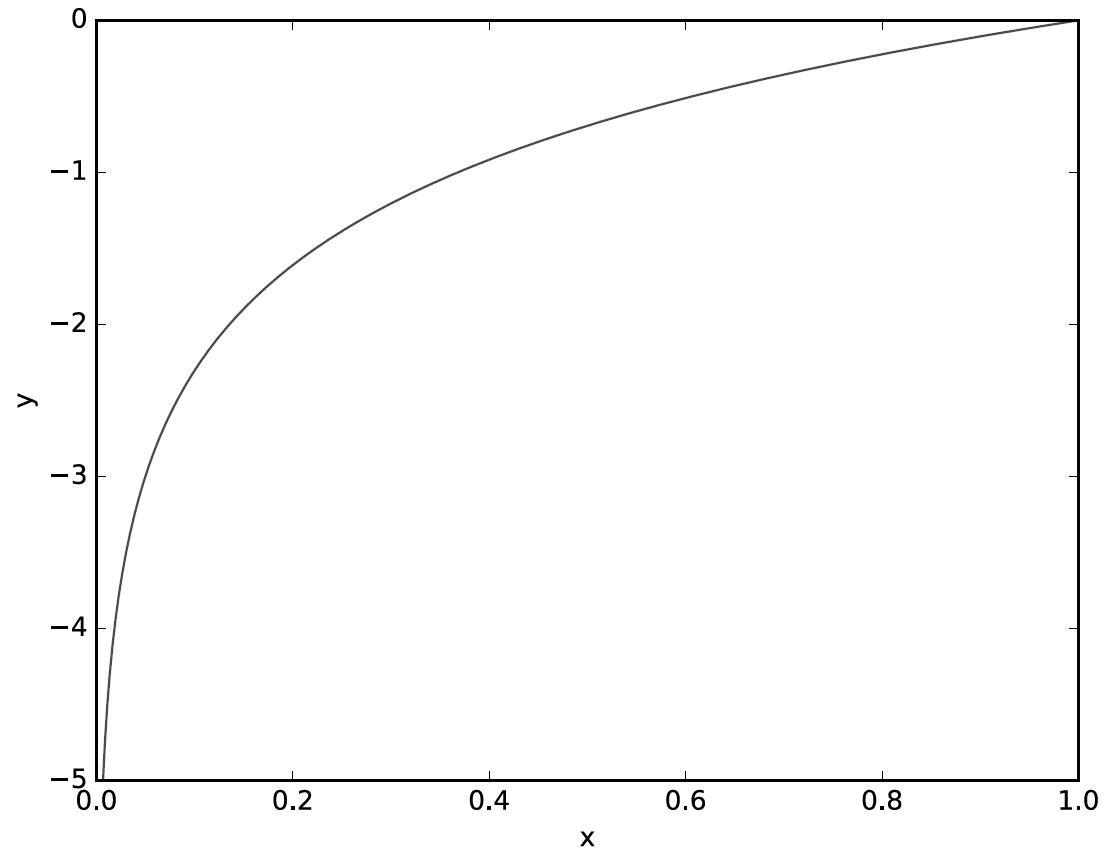

In [ ]:
print("교차 엔트로피 오차는 정답일 때의 출력이 전체 손실값을 나타낸다. \n"
     "원핫인코딩 상태의 tk(실젯값) = 0이면 E = 0이 되기 때문 \n"
     "원핫인코딩 상태의 tk(실젯값) <> 0이고 수식에 의해 산출된 값도 0이 아니면 아래와 같은 형태로 값이 출력됨")
fig("fig 4-3", w = 400)

In [ ]:
print("교차 엔트로피 함수 구현")

def cross_entropy_error(y, t):
    delta = 1e-7 
    return -np.sum(t*np.log(y + delta))# log 0 = -inf. 계산이 가능하도록 하기 위해 delta를 더해주는 것

교차 엔트로피 함수 구현


In [ ]:
# 예측값의 argmax가 index 2번이고 실젯값도 index 2번일 때
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [ ]:
# 예측값의 argmax가 index 7번이고 실젯값은 index 2번일 때
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [ ]:
print("SSE 손실함수와 마찬가지로 실젯값과 동일하게 예측한 경우 손실함수 출력값이 적다.")

SSE 손실함수와 마찬가지로 실젯값과 동일하게 예측한 경우 손실함수수 출력값이 적다.


### 미니배치 학습

위 예제는 데이터 1개의 손실함수만을 예로 들었음. 데이터 갯수(N)를 고려한 CEE는 아래와 같음 
데이터가 N개일 경우 t_nk는 실젯값 t에서 n번째 데이터 array의 k번째 데이터 값을 의미함 
또한 우변에서 N으로 나눠주는 이유는 평균을 내기 위함


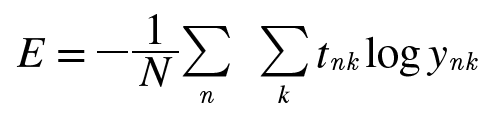

In [ ]:
print("위 예제는 데이터 1개의 손실함수만을 예로 들었음. 데이터 갯수(N)를 고려한 CEE는 아래와 같음 \n"
     "데이터가 N개일 경우 t_nk는 실젯값 t에서 n번째 데이터 array의 k번째 데이터 값을 의미함 \n"
     "또한 우변에서 N으로 나눠주는 이유는 평균을 내기 위함")
fig("e 4.3", w = 300)

In [ ]:
print("위 수식처럼 함수를 만들면 데이터 array의 갯수와 상관없이 평균 손실 함수를 구할 수 있으나 \n"
     "데이터가 너무 많으면 연산이 어렵기 때문에 mnist의 6만개의 array를 모두 사용하는 것이 아니라 일부만 골라서 학습을 수행함 \n"
     "이를 미니배치라고 함 e.g. 6만장의 이미지를 모두 사용하는 것이 아니라 그 중 100장을 무작위로 뽑아서 학습하는 것")

위 수식처럼 함수를 만들면 데이터 array의 갯수와 상관없이 평균 손실 함수를 구할 수 있으나 
데이터가 너무 많으면 연산이 어렵기 때문에 mnist의 6만개의 array를 모두 사용하는 것이 아니라 일부만 골라서 학습을 수행함 
이를 미니배치라고 함 e.g. 6만장의 이미지를 모두 사용하는 것이 아니라 그 중 100장을 무작위로 뽑아서 학습하는 것


In [ ]:
# !pip install python-mnist
# !pip install pillow

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from other.dataset.mnist import load_mnist
from PIL import Image


(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True) #flatten = True) #flatten = 배열의 평탄화, normalize = 픽셀 값을 0~255로 할 것인지(False) 0~1로 정규화 할 것인지(True),
#one_hot_label = 레이블을 원핫인코딩으로 표현할 것인지(True), 실제 레이블로 표현할 것인지(False)

img = x_train[0]
label = t_train[0]

# print("{}".format(img.shape))  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형 -> flatten = True로 되어있으면 1차원 array로 저장함. shape가 [n, ]이라는 말. 그래서 변형해주는 것임
print("원래 이미지의 형상은 {}".format(img.shape))  # (28, 28)

print("수정한 x_train의 shape는 " + str(x_train.shape))
print("수정한 t_train의 shape는 " + str(t_train.shape))

원래 이미지의 형상은 (28, 28)
수정한 x_train의 shape는 (60000, 784)
수정한 t_train의 shape는 (60000, 10)


In [ ]:
t_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
print("train set에서 무작위로 10장만 빼내려면 np.random.choice() 함수를 활용함")

train_size = x_train.shape[0] # [0] == 60000   [1] == 784
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

train set에서 무작위로 10장만 빼내려면 np.random.choice() 함수를 활용함


In [ ]:
print("이를 실제로 실행해보면 아래와 같이 무작위로 10개의 array(==행)를 출력함 \n"
     "이렇게 뽑힌 array를 미니배치의 index로 활용하는 것")
np.random.choice(60000, 10)

이를 실제로 실행해보면 아래와 같이 무작위로 10개의 array(==행)를 출력함 
이렇게 뽑힌 array를 미니배치의 index로 활용하는 것


array([ 7132, 29029, 14229, 33615, 26267, 51034, 52484, 23018, 45714,
       52157])

### (배치용) 교차 엔트로피 오차 구현하기

In [ ]:
print("미니배치를 활용하는 경우 & 원핫인코딩 상태 데이터에 대한 교차 엔트로피 오차는 이렇게 구현함")

def cross_entropy_error(y, t):
    if y.dim == 1: # 이 조건절을 넣는 이유는 y가 1차원, 즉, 데이터 array 하나당 교차 엔트로피를 구할 경우(==배치사이즈가 1인 경우)
                   # reshape함수로 데이터의 형상을 바꿔주기 위함
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    delta = 1e-7
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + delta)) / batch_size

미니배치를 활용하는 경우 & 원핫인코딩 상태 데이터에 대한 교차 엔트로피 오차는 이렇게 구현함


In [ ]:
print("미니배치를 활용하는 경우 & 원핫인코딩이 아닌 입력값 그대로 데이터에 대한 교차 엔트로피 오차는 이렇게 구현함 \n"
     "->원핫인코딩 상태인 경우 t(실젯값)가 0이면 return도 0이므로 t*np.log(y)부분을 np.log(y[np.arange(batch_size), t])로 구현 \n"
     "batch_size가 5인 경우 np.arange(batch_size)는 [0, 1, 2, 3, 4]의 np.array를 생성하고, \n"
      "t에는 레이블이 [2, 7, 0, 9, 4]와 같이 저장되어 있으므로 y[np.arange(batch_size), t]는 [y[0, 2], y[1, 7], y[2, 0], y[3, 9], y[4, 4]]인 np.array를 생성함")

def cross_entropy_error(y, t):
    if y.dim == 1: # 이 조건절을 넣는 이유는 y가 1차원, 즉, 데이터 array 하나당 교차 엔트로피를 구할 경우(==배치사이즈가 1인 경우)
                   # reshape함수로 데이터의 형상을 바꿔주기 위함
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    delta = 1e-7
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + delta)) / batch_size

미니배치를 활용하는 경우 & 원핫인코딩이 아닌 입력값 그대로 데이터에 대한 교차 엔트로피 오차는 이렇게 구현함 
->원핫인코딩 상태인 경우 t(실젯값)가 0이면 return도 0이므로 t*np.log(y)부분을 np.log(y[np.arange(batch_size), t])로 구현 
batch_size가 5인 경우 np.arange(batch_size)는 [0, 1, 2, 3, 4]의 np.array를 생성하고, 
t에는 레이블이 [2, 7, 0, 9, 4]와 같이 저장되어 있으므로 y[np.arange(batch_size), t]는 [y[0, 2], y[1, 7], y[2, 0], y[3, 9], y[4, 4]]인 np.array를 생성함


### 왜 손실 함수를 설정했는가

In [ ]:
print("Accuracy, recall, precision 등의 지표가 아니라 왜 손실함수라는 우회적인 방법을 택하는 것인가?\n"
     "미분의 역할에 주목한다면 해결되는 문제 -> \n"
      "신경망에서는 최적의 매개변수(가중치, 편향)를 탐색할 때 손실함수의 값을 가능한 한 작게하는 방향으로 탐색을 하는데, \n"
     "미분(정확히는 기울기)을 하고 이 미분 값을 단서로 매개변수 값을 서서히 갱신하는 과정을 반복한다.\n"
     "즉, 매개변수를 순간변화시켰을 때, 손실함수의 변화는 어떤가?에 초점을 맞춘다는 의미(미분계수가 음수면 양의방향으로 변화시키고, \n"
     "미분계수가 양수면 음의방향으로 변화시킨다는 말")

Accuracy, recall, precision 등의 지표가 아니라 왜 손실함수라는 우회적인 방법을 택하는 것인가?
미분의 역할에 주목한다면 해결되는 문제 -> 
신경망에서는 최적의 매개변수(가중치, 편향)를 탐색할 때 손실함수의 값을 가능한 한 작게하는 방향으로 탐색을 하는데, 
미분(정확히는 기울기)을 하고 이 미분 값을 단서로 매개변수 값을 서서히 갱신하는 과정을 반복한다.
즉, 매개변수를 순간변화시켰을 때, 손실함수의 변화는 어떤가?에 초점을 맞춘다는 의미(미분계수가 음수면 양의방향으로 변화시키고, 
미분계수가 양수면 음의방향으로 변환시킨다는 말


In [ ]:
print("Accuracy를 매개변수 조정의 지표로 삼게되면, 매개변수의 미분값이 대부분의 장소에서(local, global) 0이 될 것임\n"
     "예를 들어, Accuracy가 32%일 경우 매개변수를 약간 조정하게 되면 32.0000132%가 아니라 33%, 34%등의 띄엄띄엄한 값으로 바뀜\n"
     "손실함수의 경우에는 매개변수의 값이 조금만 조정되면 손실함수의 값도 조금만 조정됨\n"
     "Accuracy를 사용하지 않는 이유는 결국 계단함수를 활성화함수로 사용하지 않는 것과 비슷한 이치임")

Accuracy를 매개변수 조정의 지표로 삼게되면, 매개변수의 미분값이 대부분의 장소에서(local, global) 0이 될 것임
예를 들어, Accuracy가 32%일 경우 매개변수를 약간 조정하게 되면 32.0000132%가 아니라 33%, 34%등의 띄엄띄엄한 값으로 바뀜
손실함수의 경우에는 매개변수의 값이 조금만 조정되면 손실함수의 값도 조금만 조정됨
Accuracy를 사용하지 않는 이유는 결국 계단함수를 활성화함수로 사용하지 않는 것과 비슷한 이치임


계단함수는 불연속적인 변화로 인해 대부분의 위치에서 기울기가 0이지만(== 한 순간만 변하고 만다.), 시그모이드 함수는 0이 아니다.
이러한 이유로 신경망 학습에서는 기울기가 0이 되지 않는 손실함수를 활용하여 학습이 진행되는 것


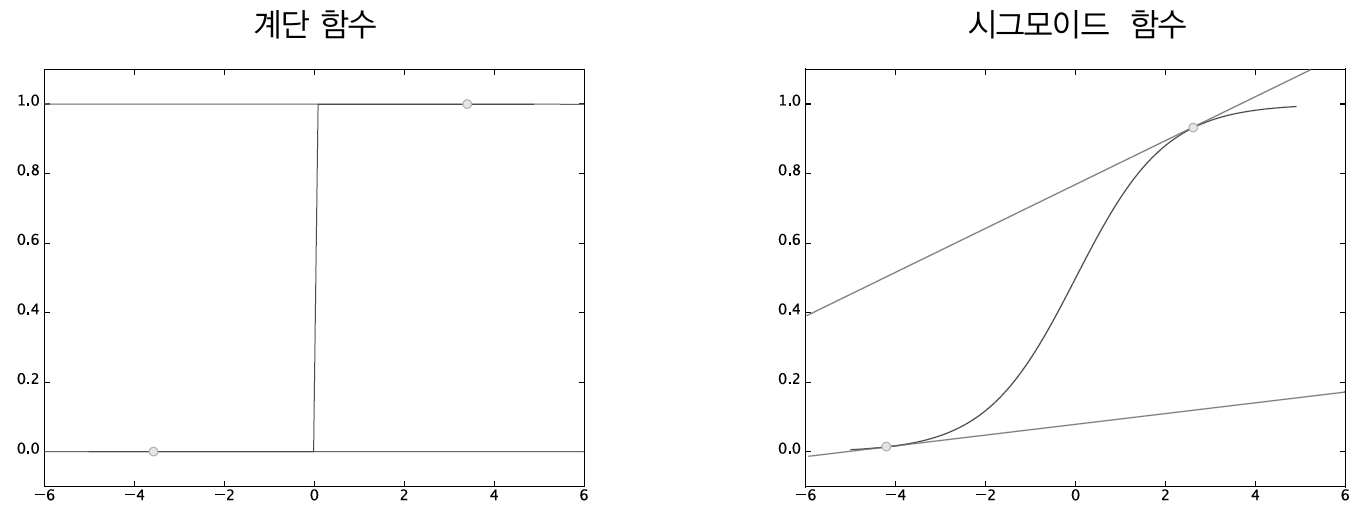

In [ ]:
print("계단함수는 불연속적인 변화로 인해 대부분의 위치에서 기울기가 0이지만(== 한 순간만 변하고 만다.), 시그모이드 함수는 0이 아니다.\n"
     "이러한 이유로 신경망 학습에서는 기울기가 0이 되지 않는 손실함수를 활용하여 학습이 진행되는 것")
fig("fig 4-4", w = 700)

## 수치 미분

In [ ]:
print("경사법에서는 기울기(경사)의 값을 기준으로 나아갈 방향을 결정함")

경사법에서는 기울기(경사)의 값을 기준으로 나아갈 방향을 결정함


### 미분

도함수: df(x)는 dx의 몇 배인가? -> 작은 변화(dx)는 f(x)를 얼마나 변화시키냐? 
함수의 값이 0에 한없이 가까워지는 극한값(미분계수)을 구하는 함수


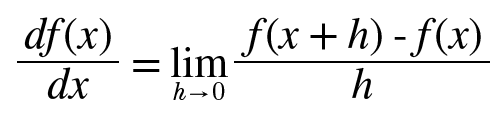

In [ ]:
print("도함수: df(x)는 dx의 몇 배인가? -> 작은 변화(dx)는 f(x)를 얼마나 변화시키냐? \n"
     "함수의 값이 0에 한없이 가까워지는 극한값(미분계수)을 구하는 함수")
fig("e 4.4", w = 400)

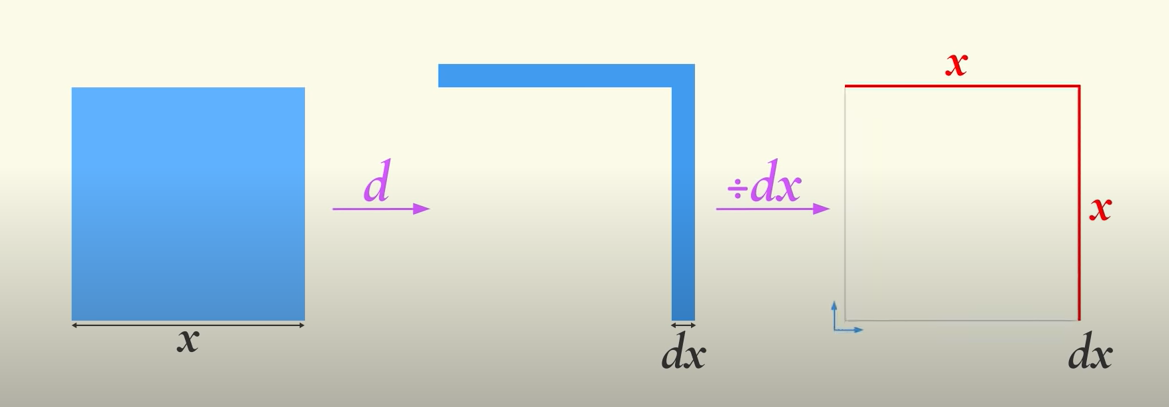

In [ ]:
fig("미분_", w = 600)

In [ ]:
# 나쁜 구현의 예

def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

h에 가급적 작은 변화를 주고싶어서 10e-50을 할당했는데, float32로 표현하면 0.0이 되어버림. 보통 10^-4를 적용함
또한 f의 차분(f(x + h)와 f(x)의 차이)과 관련한 것인데, 진정한 미분은 아래 그림의 x위치의 진정한 접선(기울기)여야 하지만 위 함수에서의 기울기는 x와 x+h 사이의 연결선이 구현됨
이 차이는 h를 무한히 0으로 좁히는 것이 불가능하여 발생하는 한계


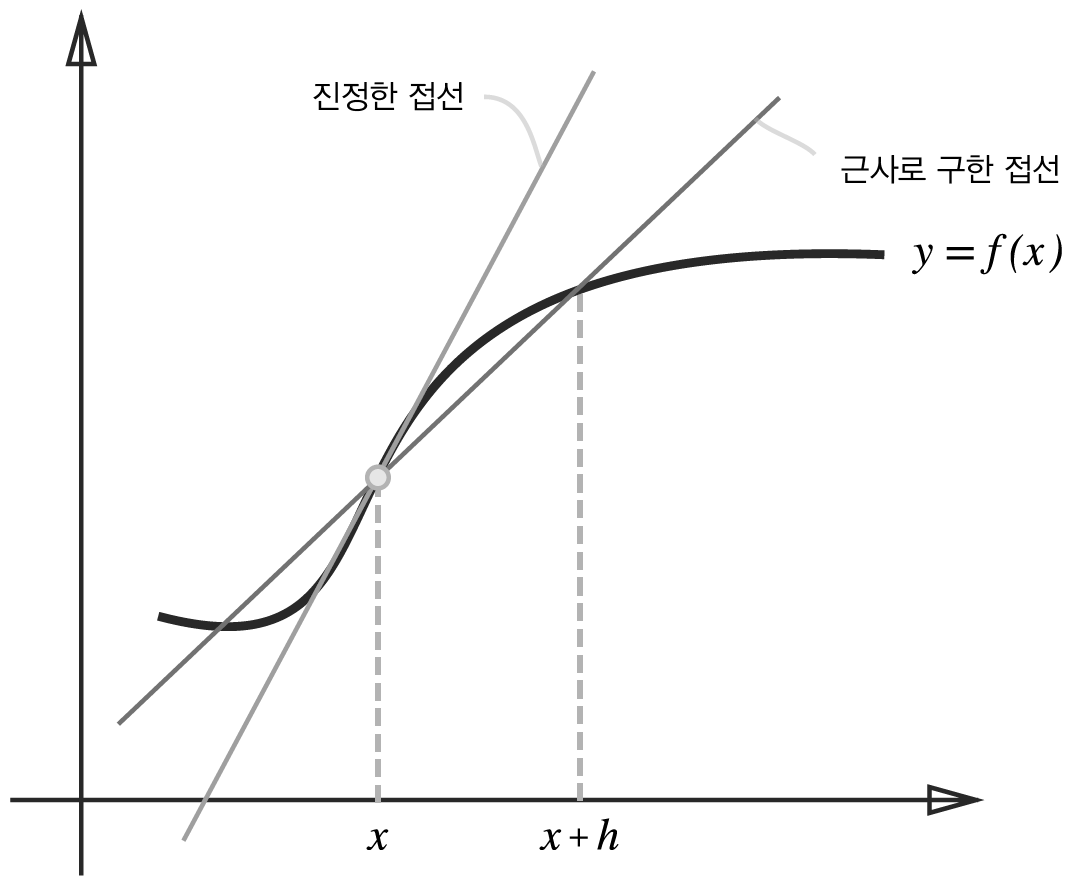

In [ ]:
print("h에 가급적 작은 변화를 주고싶어서 10e-50을 할당했는데, float32로 표현하면 0.0이 되어버림. 보통 10^-4를 적용함\n"
     "또한 f의 차분(f(x + h)와 f(x)의 차이)과 관련한 것인데, 진정한 미분은 아래 그림의 x위치의 진정한 접선(기울기)여야 하지만 위 함수에서의 기울기는 x와 x+h 사이의 연결선이 구현됨\n"
     "이 차이는 h를 무한히 0으로 좁히는 것이 불가능하여 발생하는 한계")
fig("fig 4-5", w = 400)

In [ ]:
# 개선 후 구현
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

### 수치 미분의 예(<> 해석학적 미분 = 우리가 일반적으로 배운 미분)

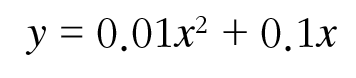

In [ ]:
fig("e 4.5")

In [ ]:
# 위 식 4.5를 구현

def function_1(x):
    return 0.01 * (x ** 2) + (0.1 * x) 

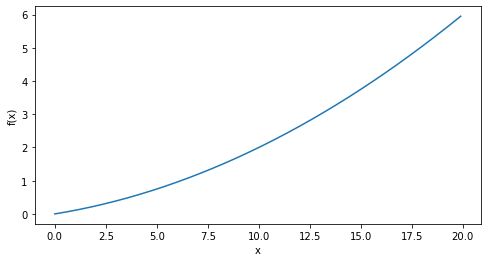

In [ ]:
plt.figure(figsize=(8,4))
x = np.arange(0.0, 20.0, 0.1) # 0부터 20까지 0.1 간격으로 
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
print("수치미분 x = 5: " + str(numerical_diff(function_1, 5)))
print("수치미분 x = 10: " + str(numerical_diff(function_1, 10)))

수치미분 x = 5: 0.1999999999990898
수치미분 x = 10: 0.2999999999986347


In [ ]:
len(np.array([1,2]))

2

In [ ]:
x = np.array([5, 10])
for i in range(len(x)):
    print("해석미분 x = {}: ".format(x[i]) + str(0.02 * x[i] + 0.1))
print("작은 오차!")

해석미분 x = 5: 0.2
해석미분 x = 10: 0.30000000000000004
작은 오차!


x = 5, x = 10에서의 접선(직선의 기울기는 수치 미분 기준 == 근사)


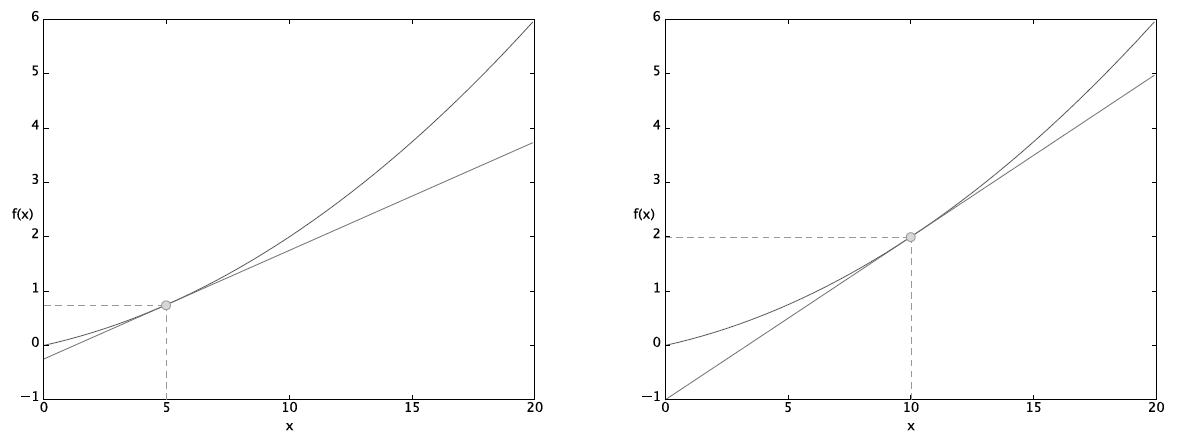

In [ ]:
print("x = 5, x = 10에서의 접선(직선의 기울기는 수치 미분 기준 == 근사)")
fig("fig 4-7", w = 600)

### 편미분(다변수 함수의 미분)

인수들의 제곱 합을 계산하는 단순한 식이지만, 앞의 예와 달리 변수가 2개


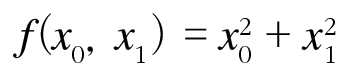

In [ ]:
print("인수들의 제곱 합을 계산하는 단순한 식이지만, 앞의 예와 달리 변수가 2개")
fig("e 4.6", w = 400)

In [ ]:
def function_2(x):
#     return x[0] ** 2 + x[1] ** 2
    return np.sum(x ** 2)

In [ ]:
function_2(np.array([15,16]))

481

위 식 4.6의 함수를 그래프로 표현할 경우 3차원으로 표현됨


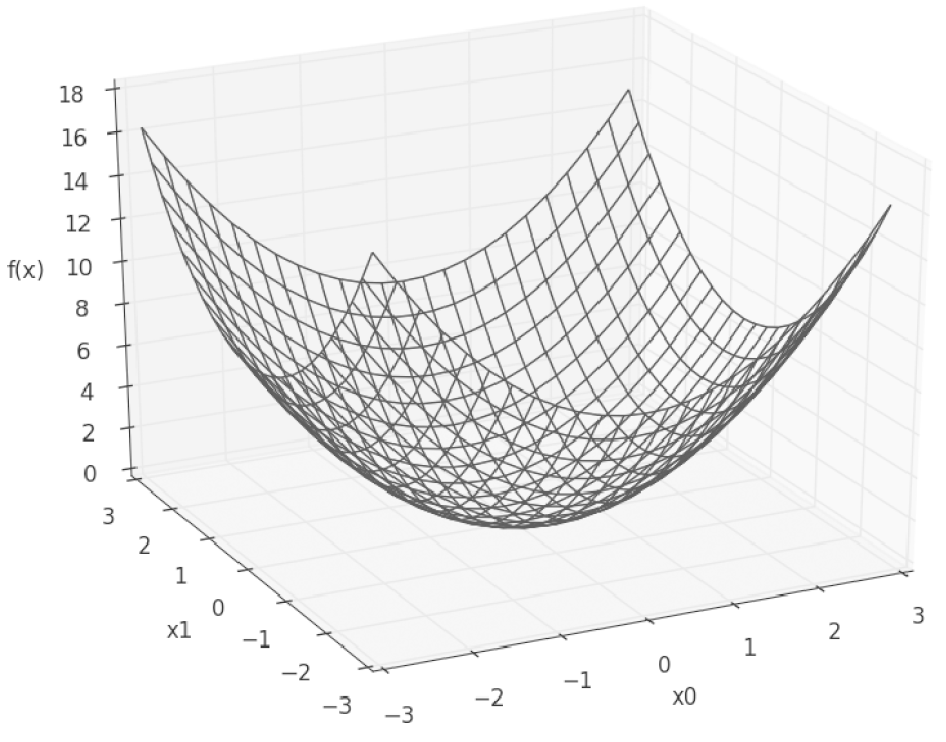

In [ ]:
print("위 식 4.6의 함수를 그래프로 표현할 경우 3차원으로 표현됨")
fig("fig 4-8", w = 500)

In [ ]:
print("식 4.6을 미분할 경우, 변수가 2개라서 어느 변수에 대한 미분인지를 반드시 구별해야함.== 편미분\n"
     "여기서 어떤 변수 x에 대한 미분이라는 의미는, x이외의 변수는 상수처럼 취급하라는 말이다.\n"
     "z = wx + b가 주어졌을 대, w에 대한 미분인 경우 x가, x에 대한 미분일 경우에는 w가, b에 대한 미분일 경우에는 1이. 미분결과로 산출")

식 4.6을 미분할 경우, 변수가 2개라서 어느 변수에 대한 미분인지를 반드시 구별해야함.== 편미분
여기서 어떤 변수 x에 대한 미분이라는 의미는, x이외의 변수는 상수처럼 취급하라는 말이다.
z = wx + b가 주어졌을 대, w에 대한 미분인 경우 x가, x에 대한 미분일 경우에는 w가, b에 대한 미분일 경우에는 1이. 미분결과로 산출


In [ ]:
print("x_0 = 3, x_1 = 4일 때, x_0에 대한 편미분을 구하라")

def function_tmp1(x0):
    return x0 ** 2 + 4 ** 2
numerical_diff(function_tmp1, 3)

x_0 = 3, x_1 = 4일 때, x_0에 대한 편미분을 구하라


6.00000000000378

In [ ]:
print("해석학적 결과")
2 * 3 + 0

해석학적 결과


6

In [ ]:
print("x_0 = 3, x_1 = 4일 때, x_1에 대한 편미분을 구하라")

def function_tmp2(x1):
    return 3 ** 2 + x1 ** 2
numerical_diff(function_tmp2, 4)

x_0 = 3, x_1 = 4일 때, x_1에 대한 편미분을 구하라


7.999999999999119

In [ ]:
print("해석학적 결과")
2 * 4 + 0

해석학적 결과


8

## 기울기

In [ ]:
print("x_0와 x_1의 편미분을 변수별로 따로 계산하지 않고, 동시에 계산하고 싶다면?")

x_0와 x_1의 편미분을 변수별로 따로 계산하지 않고, 동시에 계산하고 싶다면?


가령 $x_{0} = 3$, $x_1 = 4$일 때, $(x_{0}, x_{1})$ 양쪽의 편미분을 묶어서 $(\frac{∂f}{∂x_0}, \frac{∂f}{∂x_1})$ 을 계산 한다고 생각해보자.

이 때 $(\frac{∂f}{∂x_0}, \frac{∂f}{∂x_1})$처럼 모든 변수의 편미분을 벡터로 정리한 것을 기울기$^{gradient}$라고 한다.

In [ ]:
print("기울기 구현")
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 주어진 array와 shape가 동일한 zeros array 생성
    
    for idx in range(x.size):
        tmp_val = x[idx] 
        
        # f(x + h) 계산
        x[idx] = tmp_val + h 
        fxh1 = f(x)
        
        # f(x - h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val # 값 복원
    
    return grad

기울기 구현


In [ ]:
np.zeros_like([[1,2,3],[1,2,3]])

array([[0, 0, 0],
       [0, 0, 0]])

In [ ]:
print("점 3, 4의 기울기:" ,str(numerical_gradient(function_2, np.array([3.0, 4.0]))))
print("점 0, 2의 기울기:" ,str(numerical_gradient(function_2, np.array([0.0, 2.0]))))
print("점 3, 0의 기울기:" ,str(numerical_gradient(function_2, np.array([3.0, 0.0]))))
print("여기서 기울기의 의미는?")

점 3, 4의 기울기: [6. 8.]
점 0, 2의 기울기: [0. 4.]
점 3, 0의 기울기: [6. 0.]
여기서 기울기의 의미는?


기울기는 아래 그림처럼 크기와 방향을 가진 벡터(화살표)로 그려진다.
기울기는 함수가 만들어내는 가장 낮은 장소(최솟값)을 향하는 것처럼 보임
또한 중점에서 멀어질수록 벡터의 크기가 커지는 것을 알 수 있음


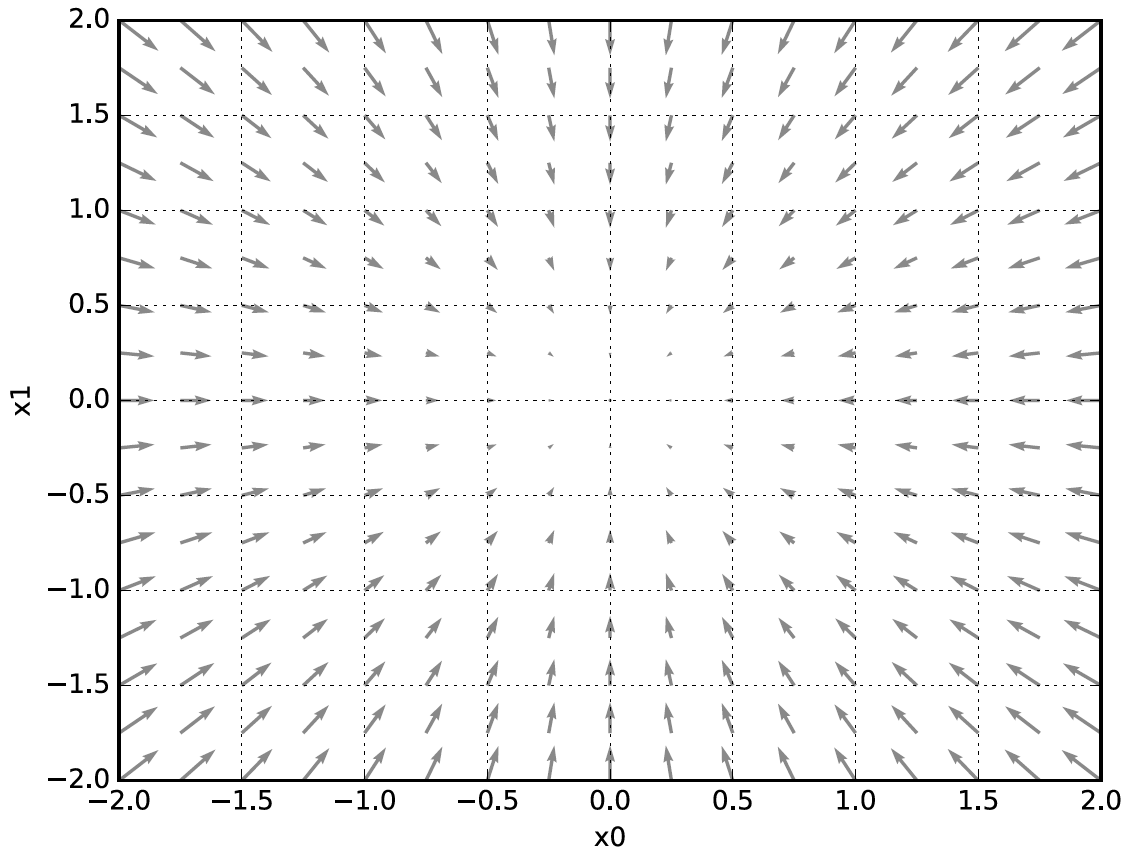

In [ ]:
print("기울기는 아래 그림처럼 크기와 방향을 가진 벡터(화살표)로 그려진다.\n"
     "기울기는 함수가 만들어내는 가장 낮은 장소(최솟값)을 향하는 것처럼 보임\n"
     "또한 중점에서 멀어질수록 벡터의 크기가 커지는 것을 알 수 있음")
fig("fig 4-9", w = 400)

In [ ]:
print("엄밀히 따지자면 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향\n"
     "== 미분을 했을 때 미분계수가 음수냐, 양수냐에 따라서 탐색의 방향이 달라지기 때문")

엄밀히 따지자면 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향
== 미분을 했을 때 미분계수가 음수냐, 양수냐에 따라서 탐색의 방향이 달라지기 때문


### 경사법(경사하강법)

In [ ]:
print("신경망은 학습과정에서 최적의 매개변수, 즉, 손실함수가 최솟값이 되는 매개변수를 찾아야 함.\n"
     "매개변수의 공간은 너무나 광범위해서 어디가 최솟값인지, 정말 최솟값인지 판단하기 어려움\n"
     "때문에 기울기를 잘 이용해서(기울기의 방향을 통해서) 함수의 최솟값 또는 가능한 한 작은 값을 찾는 방법이\n"
     "경사하강법이다.")

신경망은 학습과정에서 최적의 매개변수, 즉, 손실함수가 최솟값이 되는 매개변수를 찾아야 함.
매개변수의 공간은 너무나 광범위해서 어디가 최솟값인지, 정말 최솟값인지 판단하기 어려움
때문에 기울기를 잘 이용해서(기울기의 방향을 통해서) 함수의 최솟값 또는 가능한 한 작은 값을 찾는 방법이
경사하강법이다.


경사하강법의 수식
여기서 n(에타)은 탐색(학습)하는 정도를 나타냄 == learning_rate == step_size
4.7 식에서는 변수가 2개인 경우이지만, 변수의 수가 늘어도 같은 식(편미분)을 통해 탐색하게됨
learning_rate는 미리 설정해야 하고, 너무 크거나 너무 작으면 최적의 장소를 탐색하는 데 적절치 않게 된다.


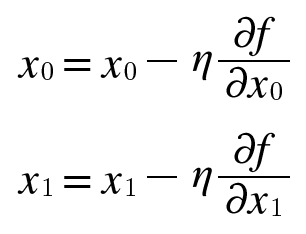

In [ ]:
print("경사하강법의 수식\n"
     "여기서 n(에타)은 탐색(학습)하는 정도를 나타냄 == learning_rate == step_size\n"
     "4.7 식에서는 변수가 2개인 경우이지만, 변수의 수가 늘어도 같은 식(편미분)을 통해 탐색하게됨\n"
     "learning_rate는 미리 설정해야 하고, 너무 크거나 너무 작으면 최적의 장소를 탐색하는 데 적절치 않게 된다.")
fig("e 4.7")

In [ ]:
def gradient_descent(f, init_x, lr = 0.01, step_num=100): #f는 최적화하려는 함수, init_x는 초깃값, lr은 learning_rate, step_num은 반복횟수
    x = init_x
    
    for i in range(step_num): # 이 for문을 step_num만큼 반복하는데
        grad = numerical_gradient(f, x) # 위에서 만든 함수로 기울기를 구하고
        x -= lr * grad # 정해놓은 lr에 기울기를 곱해서 초깃값에서 빼줌()
    return x

In [ ]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

init_x = np.array([-3.0, 4.0])
result = gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

print("최종 탐색결과가 {}이므로 (0, 0)에 가까운 결과이기 때문에 경사하강법으로 거의 정확한 결과를 얻은 것".format(result))

최종 탐색결과가 [-6.11110793e-10  8.14814391e-10]이므로 (0, 0)에 가까운 결과이기 때문에 경사하강법으로 거의 정확한 결과를 얻은 것


경사하강법을 통해 최적의 장소를 탐색하는 과정(x_0과 x_1이 0에 가까운 지점)


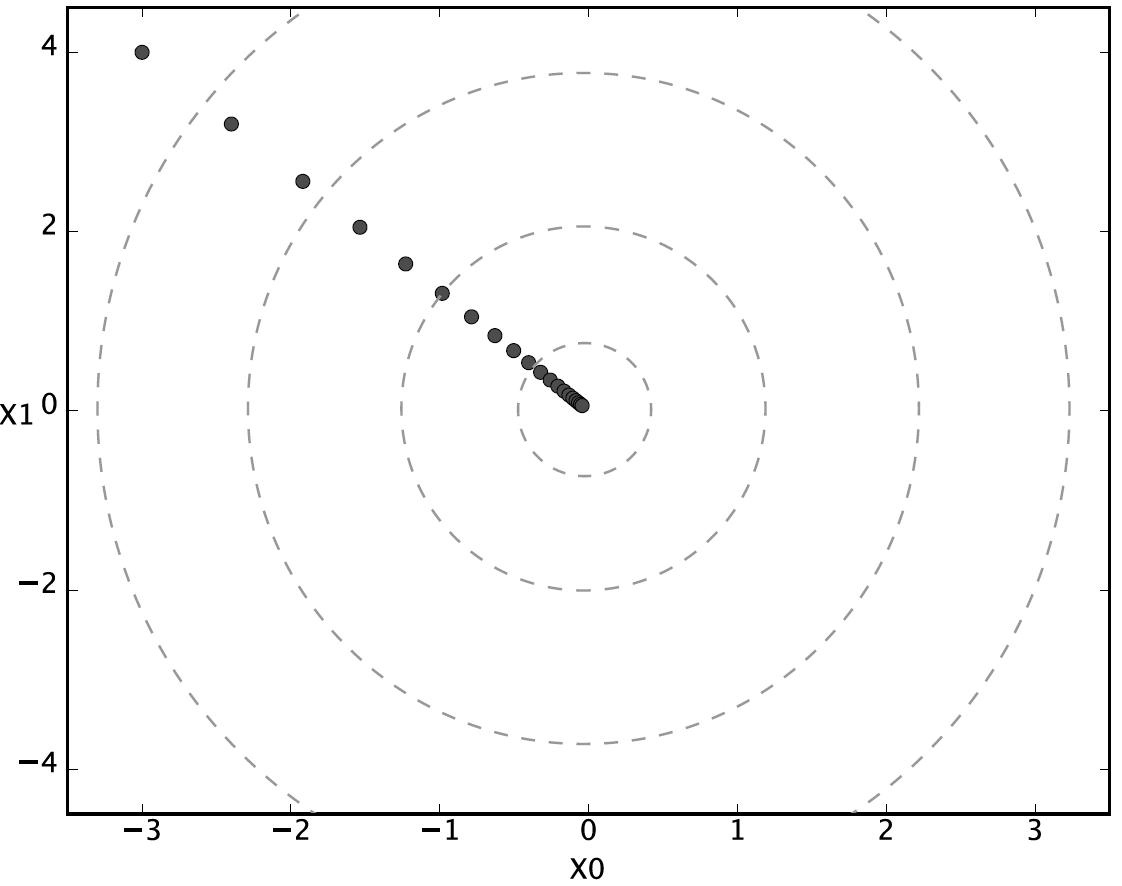

In [ ]:
print("경사하강법을 통해 최적의 장소를 탐색하는 과정(x_0과 x_1이 0에 가까운 지점)")
fig("fig 4-10", w = 400)

In [ ]:
print("learning_rate를 조정했을 때의 결과 확인")

print("학습률이 너무 클 때(lr = 10.0) -> 탐색의 폭이 너무 커서 왔다갔다만 하다가 학습이 종료된다.")
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100))


print("학습률이 너무 작을 때(lr = 1e-10) -> 탐색의 폭이 너무 작아서(소극적이어서) 얼마 탐색 못해보고 학습이 종료된다.")
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100))



learning_rate를 조정했을 때의 결과 확인
학습률이 너무 클 때(lr = 10.0) -> 탐색의 폭이 너무 커서 왔다갔다만 하다가 학습이 종료된다.
[-2.58983747e+13 -1.29524862e+12]
학습률이 너무 작을 때(lr = 1e-10) -> 탐색의 폭이 너무 작아서(소극적이어서) 얼마 탐색 못해보고 학습이 종료된다.
[-2.99999994  3.99999992]


In [ ]:
print("이렇게 사용자가 설정해줘야 하는 파라미터를 hyper parameter(초매개변수)라 칭함 - 통상 여러 lr을 dict로 놓고 파라미터 서치\n"
     "*가중치와 편향같은 매개변수와는 성질이 다름(얘네는 학습과정을 통해 자동으로 획득, 갱신되는 매개변수)")

이렇게 사용자가 설정해줘야 하는 파라미터를 hyper parameter(초매개변수)라 칭함 - 통상 여러 lr을 dict로 놓고 파라미터 서치
*가중치와 편향같은 매개변수와는 성질이 다름(얘네는 학습과정을 통해 자동으로 획득, 갱신되는 매개변수)


### 신경망에서의 기울기 - simplenet부터 다시

In [ ]:
print("*탐색의 방향때문이 아닌 가중치 매개변수에 대한 손실함수의 기울기\n\n")
print("가중치가 W, 손실함수가 L, shape가 2 * 3인 신경망이 있다.")

*탐색의 방향때문이 아닌 가중치 매개변수에 대한 손실함수의 기울기


가중치가 W, 손실함수가 L, shape가 2 * 3인 신경망이 있다.


위 신경망의 경사는 $\frac{∂L}{∂W}$로 나타낼 수 있음. 


<!-- $A^{(1)} = ( a^{(1)}_{1 }, a^{(1)}_{2 }, a^{(1)}_{3 })$

$X = (x_1, x_2)$

$B^{(1)} = ( b^{(1)}_{1 }, b^{(1)}_{2 }, b^{(1)}_{3 })$

$W^{(1)} = \begin{pmatrix} w^{(1)}_{11} & a^{(1)}_{21} & a^{(1)}_{31}
\\ w^{(1)}_{12} & a^{(1)}_{22} & a^{(1)}_{32} \end{pmatrix}$ -->

형상을 표현하면 아래와 같음


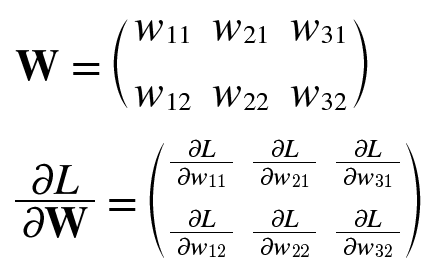

In [ ]:
print("형상을 표현하면 아래와 같음")
fig("e 4.8", w = 350)

예를 들어 1행 1번째 원소인 $\frac{∂L}{∂W_{11}}$은 $W_{11}$을 조금 변경했을 때 손실함수 L이 얼마나 변화하는 지를 나타냄

*여기서 중요한 건 $\frac{∂L}{∂W}$의 형상이 W와 같다는 것(shape)

In [ ]:
os.pardir

'..'

In [ ]:
print("기울기 구하는 코드 구현")

import sys, os
sys.path.append(os.pardir)
from other.common.functions import softmax, cross_entropy_error
from other.common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

기울기 구하는 코드 구현


In [ ]:
net = simpleNet() # 위 클래스
print("가중치 매개변수: " +str(net.W)) # 가중치 매개변수

x = np.array([0.6, 0.9])
p = net.predict(x)
print("predict: "+ str(p))
print("argmax(p): " + str(np.argmax(p)))

t = np.array([0, 0, 1]) # 정답 레이블
print("loss: " + str(net.loss(x, t)))

가중치 매개변수: [[ 0.70289547 -1.7199631   1.97003561]
 [-0.37565672 -0.26131083  0.10533304]]
predict: [ 0.08364624 -1.2671576   1.2768211 ]
argmax(p): 2
loss: 0.32339421942441604


In [ ]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.1316781   0.03410884 -0.16578693]
 [ 0.19751715  0.05116325 -0.2486804 ]]


In [ ]:
print("위 2*3 행렬은 각 W가 변화할 때 Loss의 변화를 의미함\n"
     "예를 들어 1,1의 w가 0.049만큼 변할 때 손실함수는 0.049h만큼 증가한다라는 의미, 1, 3은 음수이니까 감소의 의미이며, 그 크기가 1,1보다 큼")

위 2*3 행렬은 각 W가 변화할 때 Loss의 변화를 의미함
예를 들어 1,1의 w가 0.049만큼 변할 때 손실함수는 0.049h만큼 증가한다라는 의미, 1, 3은 음수이니까 감소의 의미이며, 그 크기가 1,1보다 큼


In [ ]:
print("참고 - 보통 새 함수를 정의할 때 def f(x): 문법을 썼는데, 간단한 함수라면 lambda를 쓰는 것이 더 편함")

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

참고 - 보통 새 함수를 정의할 때 def f(x): 문법을 썼는데, 간단한 함수라면 lambda를 쓰는 것이 더 편함


## 학습 알고리즘 구현하기

신경망 학습의 순서 복습

*전제 : 신경망에는 적응 가능한 가중치, 편향이 있고 이를 훈련데이터에 적응하도록 조정하는 과정을 '학습'이라 표현함. 4단계로 구성

1단계 - 미니배치
- 훈련 데이터 중 일부를 무작위로 가져옴. 이렇게 선별한 데이터를 미니배치라 하고, 미치배치의 손실 함수 값을 줄이는 것이 학습의 목표

2단계 - 기울기 산출
- 미니배치의 손실 함수 값을 줄이기 ㅣ위해 각 가중치 매개변수의 기울기를 구함. 기울기는 손실 함수의 값을 가장 작게만드는 방향을 제시함(음, 양, 크기)

3단계 - 매개변수 갱신
- 가중치 매개변수를 기울기 방향으로 아주 조금 갱신

4단계 - 반복
- 1 ~ 3단계를 반복한다.


### 2층 신경망 클래스 구현하기

In [ ]:
print("2층 신경망 클래스 구현하기")

import sys, os
sys.path.append(os.pardir)
from other.common.functions import *
from other.common.gradient import numerical_gradient

class TwoLayerNet:
    #초기화를 수행한다. 인수는 순서대로 입력층의 뉴런수, 은닉층의 뉴런수, 출력층의 뉴런수)
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):#28*28인 이미지는 총 784개의 input, ouput은 10개(0~9레이블)
        #가중치 초기화
        # params = 신경망의 매개변수를 보고나하는 딕셔너리
        self.params = {}
        #params["W1"]은 1번째 층의 가중치, params["b1"]은 1번째 층의 편향
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        #params["W2"]은 2번째 층의 가중치, params["b2"]은 2번째 층의 편향
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
    
    #예측을 수행한다.(인수 x는 이미지 데이터)
    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    # 손실 함수의 값을 구한다.(인수 x는 이미지 데이터, t는 정답레이블)
    # x: 입력 데이터, t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        
        return accuracy
    
    # 가중치 매개변수의 기울기를 구한다.
    # x: 입력 데이터, t: 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        #기울기를 보관하는 딕셔너리
        grads = {}
        # grads["W1"]은 1번째 층의 기울기, grads["b1"]은 1번째 층 편향의 기울기(편미분이니깐 2개)
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        # grads["W2"]은 2번째 층의 기울기, grads["b2"]은 2번째 층 편향의 기울기(편미분이니깐 2개)
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
    
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

2층 신경망 클래스 구현하기


In [ ]:
print("params에 어떤 변수가 저장되는지 확인 - 신경망에 필요한 매개변수가 모두 저장된다.")
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
print(net.params["W1"].shape)
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)

params에 어떤 변수가 저장되는지 확인 - 신경망에 필요한 매개변수가 모두 저장된다.
(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
x = np.random.rand(100, 784) # 더미 입력데이터(100장 분량)
y = net.predict(x)
y

array([[0.10060107, 0.09804471, 0.09337275, 0.09992277, 0.10537222,
        0.10372292, 0.10122974, 0.09298563, 0.10649103, 0.09825717],
       [0.10029305, 0.09740854, 0.09342142, 0.0997259 , 0.10499437,
        0.10393617, 0.10157147, 0.09372242, 0.10668302, 0.09824365],
       [0.10081762, 0.09728536, 0.09364134, 0.09986357, 0.10510942,
        0.10369871, 0.10152591, 0.09339947, 0.10642062, 0.09823797],
       [0.10013686, 0.09793044, 0.09369347, 0.09990554, 0.1053059 ,
        0.10352641, 0.10125923, 0.09342499, 0.1067002 , 0.09811697],
       [0.10047042, 0.09751987, 0.09356619, 0.09951508, 0.10528803,
        0.10412455, 0.1014712 , 0.09351407, 0.10646326, 0.09806735],
       [0.10050992, 0.09789261, 0.09348415, 0.10010198, 0.10466036,
        0.10391155, 0.10136658, 0.09301839, 0.1066001 , 0.09845436],
       [0.10061048, 0.09778142, 0.09343471, 0.09944236, 0.10528209,
        0.10367688, 0.10125033, 0.09369134, 0.10655063, 0.09827977],
       [0.10010725, 0.0978739 , 0.0935395

In [ ]:
print("numerical_gradient() method를 활용한 기울기 계산을 하면 grads 변수에 기울기 데이터가 저장됨")

t =  np.random.rand(100, 10) # 100장 분량의 더미 정답 레이블

grads = net.gradient(x, t)

print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)

numerical_gradient() method를 활용한 기울기 계산을 하면 grads 변수에 기울기 데이터가 저장됨
(784, 100)
(100,)
(100, 10)
(10,)


### 미니배치 학습 구현하기

In [ ]:
print("훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대해서 경사하강법으로 매개변수를 갱신하는 것")
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

from other.dataset.mnist import load_mnist
from other.ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []

# 하이퍼 파라미터
iters_num = 10000 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
#    grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선 version
    
    # 매개변수 갱신
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 미니배치 크기를 100으로 했기 때문에 매번 60,000개의 훈련 데이터에서 임의로 100개의 데이터를 샘플링하고,
    # 100개의 미니배치를 대상으로 경사하강법을 수행하여 매개변수를 갱신함
    # 갱신횟수를 10,000번으로 설정했기 때문에 100번의 미니배치 * 10,000회 반복

훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대해서 경사하강법으로 매개변수를 갱신하는 것


In [ ]:
train_loss_list

[2.2936925247562625,
 2.297202424487926,
 2.293136416124208,
 2.2975421687226145,
 2.271541633809076,
 2.283856935223497,
 2.267464199076339,
 2.29650408876734,
 2.299772044965029,
 2.295234038060742,
 2.2848216726552444,
 2.2847519008976573,
 2.30474547934229,
 2.3037923728155505,
 2.2905386345978638,
 2.284358278937318,
 2.3013665218576573,
 2.2916688692460516,
 2.2955813232682103,
 2.2870286798782153,
 2.2847716155621343,
 2.291591066016911,
 2.2942059338558187,
 2.2812911920368406,
 2.2497638440519094,
 2.291754025547649,
 2.311289880096022,
 2.2909397324710854,
 2.2579491873167146,
 2.2594057283862834,
 2.2917518966278285,
 2.284496845293228,
 2.2939364006298946,
 2.300538984255672,
 2.299195568093384,
 2.306043603560978,
 2.2920276042919308,
 2.2911329080976413,
 2.277939138195117,
 2.297548945012433,
 2.2957288263896585,
 2.278555296131434,
 2.29090533986587,
 2.297582454244399,
 2.3007944639733706,
 2.2890299169448296,
 2.2804451187398223,
 2.2963538986538943,
 2.28617955251604

반복횟수가 지속됨에 따라 손실 함수의 값이 줄어들고 있음 -> 학습이 잘되고있다.


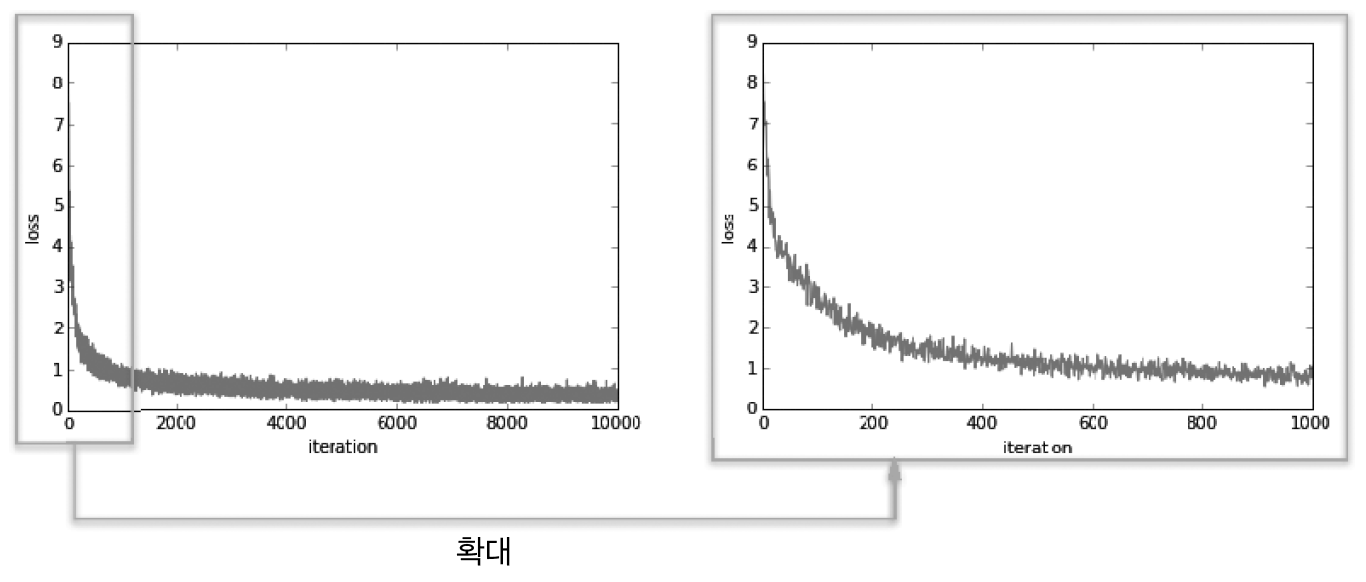

In [ ]:
print("반복횟수가 지속됨에 따라 손실 함수의 값이 줄어들고 있음 -> 학습이 잘되고있다.")
fig("fig 4-11", w = 600)

### 시험 데이터로 평가하기

In [ ]:
print("1 에폭당(epoch) train set과 test set의 정확도 비교\n"
     "epoch = 학습에서 훈련 데이터를 모두 소진했을 때 1회 카운트. e.g. 1000개의 데이터를 100개의 미니배치로 학습할 경우,\n"
     "경사하강법을 총 10회 반복하면 모든 훈련 데이터를 소진하게 됨. 이 경우 10번의 iter가 끝나면 1 epoch로 카운트")

1 에폭당(epoch) train set과 test set의 정확도 비교
epoch = 학습에서 훈련 데이터를 모두 소진했을 때 1회 카운트. e.g. 1000개의 데이터를 100개의 미니배치로 학습할 경우,
경사하강법을 총 10회 반복하면 모든 훈련 데이터를 소진하게 됨. 이 경우 10번의 iter가 끝나면 1 epoch로 카운트


In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from other.dataset.mnist import load_mnist
from other.ch04.two_layer_net import TwoLayerNet

# from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.7854833333333333, 0.7897
train acc, test acc | 0.8783333333333333, 0.8801
train acc, test acc | 0.8975333333333333, 0.9005
train acc, test acc | 0.9084666666666666, 0.9099
train acc, test acc | 0.9143333333333333, 0.918
train acc, test acc | 0.9195333333333333, 0.921
train acc, test acc | 0.9232166666666667, 0.9259
train acc, test acc | 0.9281166666666667, 0.9297
train acc, test acc | 0.93115, 0.9327
train acc, test acc | 0.93425, 0.9362
train acc, test acc | 0.9366833333333333, 0.9379
train acc, test acc | 0.9387, 0.9383
train acc, test acc | 0.9415, 0.9433
train acc, test acc | 0.9433, 0.9447
train acc, test acc | 0.9455333333333333, 0.9458
train acc, test acc | 0.9475166666666667, 0.9484


훈련 데이터와 시험 데이터에 대한 정확도 추이


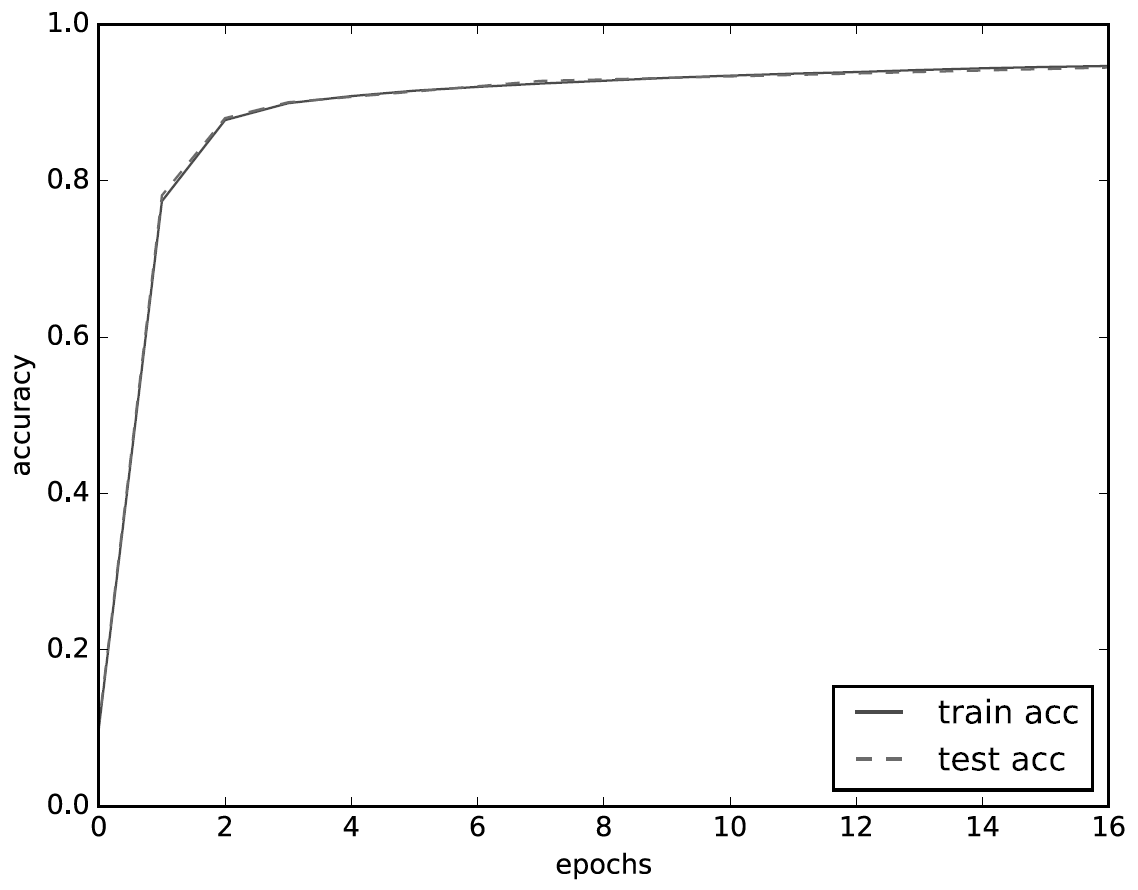

In [ ]:
print("훈련 데이터와 시험 데이터에 대한 정확도 추이")
fig("fig 4-12", w = 500)

## 정리

이번 장에서는 신경망 학습에 대하여 공부함

1) 가장 먼저 신경망이 학습을 수행할 수 있도록 손실 함수(loss function) 지표를 도입했고, 이 손실 함수의 값이 가장 작아지는 가중치 매개변수 값을 찾아내는 것이 신경망 학습의 목표

2) 또한 가능한 한 작은 손실 함수의 값을 찾는 방법으로 경사하강법을 소개함(함수의 기울기)